# Midterm: Classification Analysis
**Author:** Trent Rueckert

**Date:** April 5, 2025

**Objective:** Apply classification modeling techniques/analysis on a dataset.

## Introduction
In this notebook, I will analyze the UCI Banknote Authentication Dataset to predict banknote authentcitiy by preparing/exploring the data, cleaning the data/handling missing values, performing feature engineering, and training classification models based on different selected features.

## Imports
Import the necessary libraries with the code below.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data
### 1.1 Load the dataset and display the first 10 rows

In [10]:
# Load the dataset
df = pd.read_csv(r"C:\Users\trent\Projects\ml_classification_trentrueckert\data\data_banknote_authentication.txt", delimiter=",", header=None)

# Add column names
df.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

# Display the first 10 rows
df.head(10)

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


### 1.2 Check for missing values and display summary statistics

In [5]:
# Check for missing values
print('Missing Values:')
print(df.isnull().sum(), '\n')

# Show summary statistics
print('Summary Statistics:')
print(df.describe())

Missing Values:
variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64 

Summary Statistics:
          variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### Reflection 1
1. What do you notice about the dataset?
   * There are no missing values in the entire dataset, class is binary with all of the '0' entries first followed by the '1' entries, the first 4 columns have a range of at least 10 if not even higher.
2. Are there any data issues?
   * There could be some possible outliers in skewness and kurtosis.

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions
* Create histograms, boxplots, and count plots for categorical variables (as applicable).
* Identify patterns, outliers, and anomalies in feature distributions.
* Check for class imbalance in the target variable (as applicable).

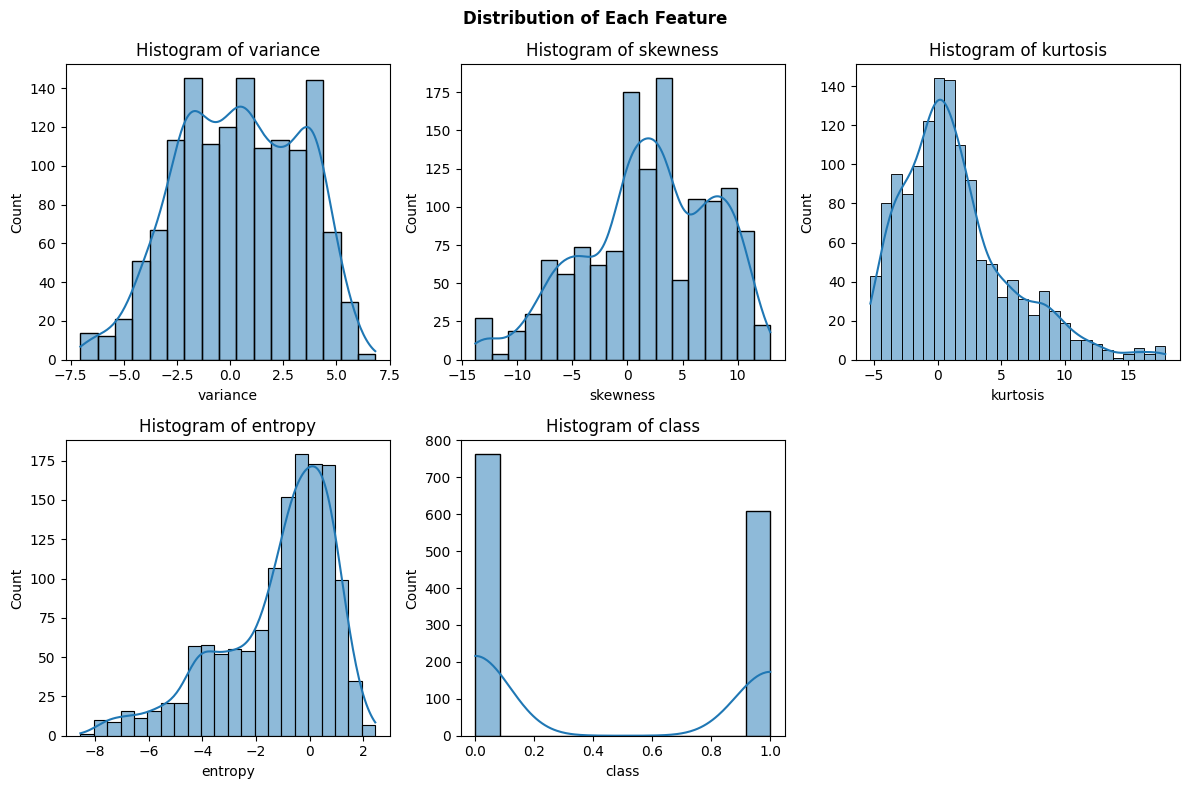

In [20]:
# Create frequency histograms
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

# Show the plots and title
plt.suptitle('Distribution of Each Feature', fontweight='bold')
plt.tight_layout()
plt.show()

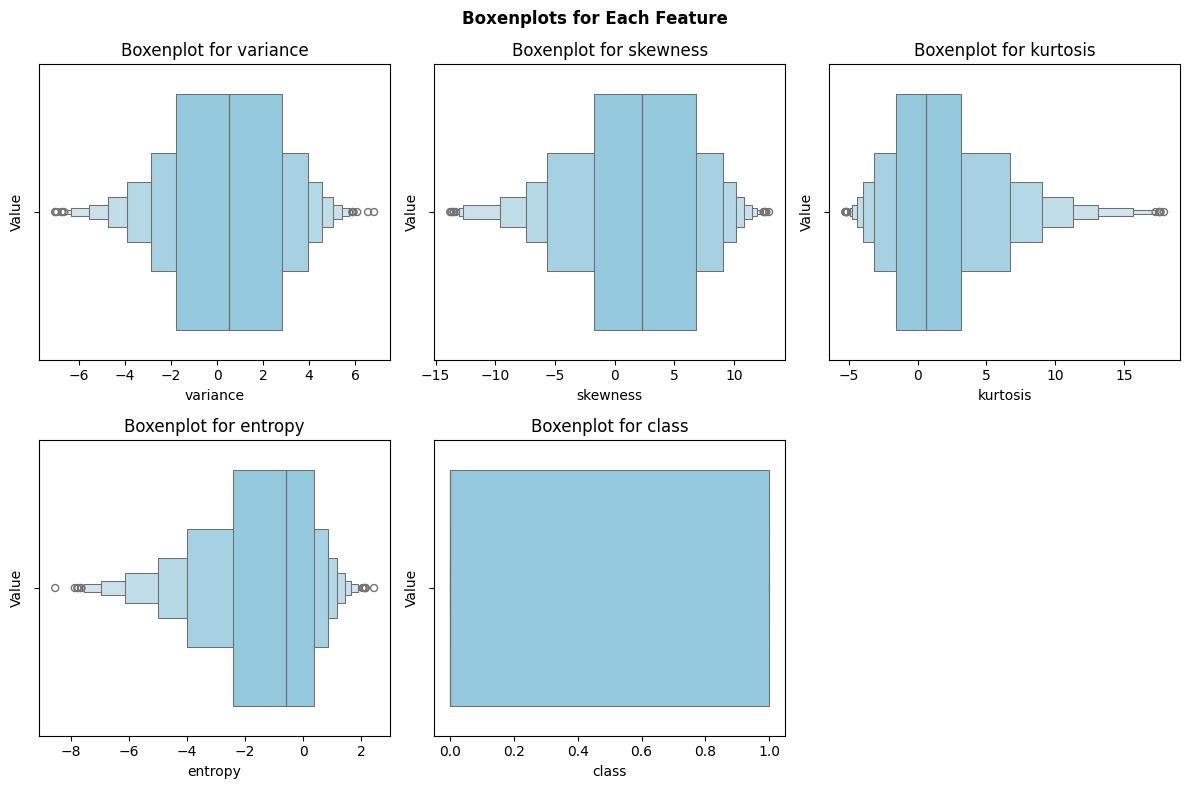

In [21]:
# Create boxplots
plt.figure(figsize=(12,8))

# Create boxenplots for each feature
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxenplot(x=df[column], color='skyblue')
    plt.title(f'Boxenplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

# Show the plots and title
plt.suptitle('Boxenplots for Each Feature', fontweight='bold')
plt.tight_layout()
plt.show()

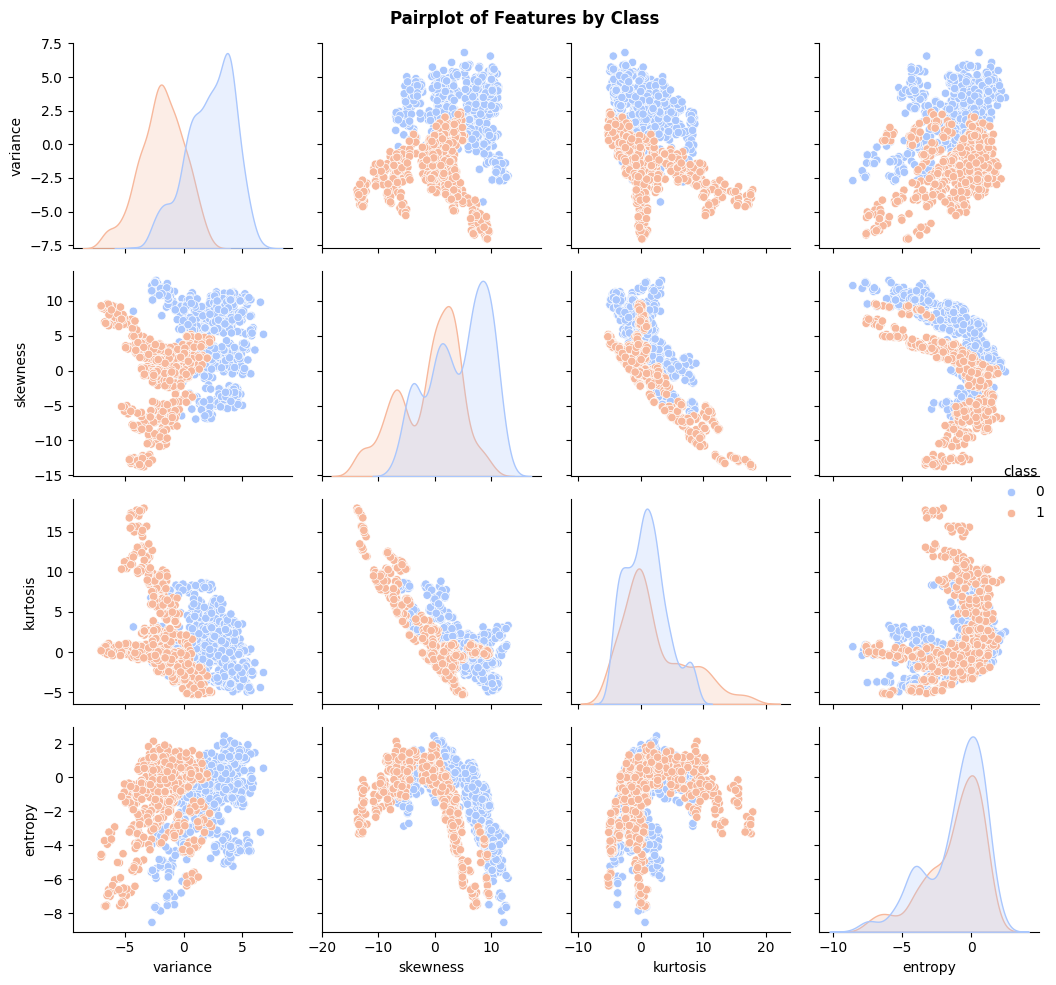

In [24]:
# Create a pairwise plot to identify patterns, outliers, or anomalies
sns.pairplot(df, hue='class', palette='coolwarm')
plt.suptitle('Pairplot of Features by Class', fontweight='bold')
plt.tight_layout()
plt.show()